# Title: BrainStroke Prediction Using Random Forest with Hyperparameter Tuning

#### Individual's Name : Paras Arora

####  Emails : 200570911@student.georgianc.on.ca 

### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
This project aims to predict the brain stroke using RF using hyper parameter tuning.
*********************************************************************************************************************
#### Github Repo: 

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
This paper performance of machine learning models (Decision Tree, XGBoost, Random Forest, KNN) are used to predict the brain stroke. The proposed study depicts that Decision Tree provide the accuracy of 97.3%, XGBoost: 98%, Random Forest: 99.3%, KNN: 97.42 on the dataset used for the prediction.

#### PROBLEM STATEMENT :
*	Try to replicate the results given in paper on text classification datasets with RF hyperparamter tuning choose 1 standard datsets :  
* To assess the effectivness of with RF hypertuning, on classified dataset
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
* In recent years, brain strokes have emerged as a significant health concern, causing substantial morbidity and mortality worldwide. A key role in early healthcare intervention, efficient treatment and improvement of patients' outcomes can be played by rapid and precise brain stroke prediction. Clinical indicators and health information, which might not be sufficiently accurate as a way of predicting premature stroke, are used in traditional risk assessment methods. There is a growing interest in using machine learning models to improve the accuracy and effectiveness of brain stroke prediction so that we can solve this problem. These models are able to look for small patterns and risk factors related to stroke occurrence by analyzing a wide range of patient data, such as demographics, health records, brain scans, lifestyle factors. In the development of and refinement of machine learning algorithms for stroke prediction, healthcare professionals may potentially be able to predict individuals with a higher degree of risk in order to provide timely prevention measures.
*********************************************************************************************************************
#### SOLUTION:
* The proposed approach uses a basic concept of classification
* Apply RF hypertuning  to enhance the prediction accuracy.


 # Methodology
*********************************************************************************************************************
Methodology for Random Forest with Hyperparameter Tuning:
* Load and Preprocess Data:
Load the necessary libraries and the dataset from the provided repository. Preprocess the data if required, including handling missing values, encoding categorical variables, and splitting the data into features (X) and target (y).

* Split Data into Training and Testing Sets:
Split your dataset into training and testing sets using a technique like train_test_split from scikit-learn. This will allow you to train your model on one subset and evaluate its performance on another.

* Create the parameter grid for hyperparameter tuning. This includes various values for hyperparameters you want to optimize. For example:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

* Create the classifier object and the GridSearchCV object:

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

* Fit the GridSearchCV object to the training data:

grid_search.fit(X_train, y_train)

* Get the best model from the grid search:

best_rf = grid_search.best_estimator_


* Predict the target values on the testing set using the best model:

y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

* Evaluate the model's performance using metrics such as accuracy and ROC AUC score:

accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc)




# Implementation


In [69]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<p  style="color:cyan;"> Emil Bluemax : PES2UG20CS431 <br> J P Daniel Christopher : PES2UG20CS433 <br> Aditya Khot : PES2UG20CS414 </p>

In [70]:
# The dataframe is read from the csv file - healthcare-dataset-stroke-data.csv - taken from kaggle
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [71]:
# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
#df.value_counts()

### Find the number of NULL values in each column

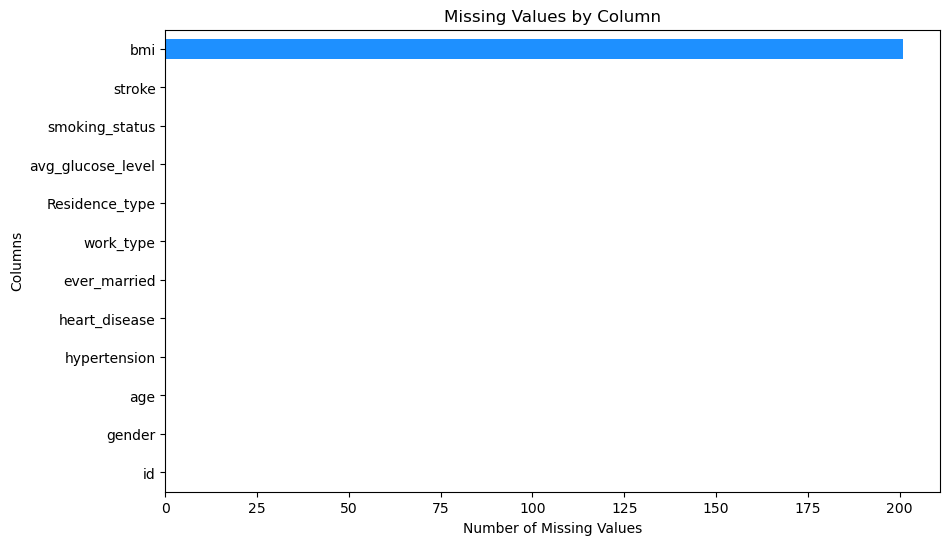

In [74]:
# Printing the number of N/A values in each column
na_counts = df.isna().sum()

# Plotting a bar graph with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
na_counts.sort_values(ascending=True).plot(kind='barh', color='dodgerblue')

plt.title('Missing Values by Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')

plt.show()

* Found 201 NULL values in bmi column

In [75]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [76]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## PRE PROCESSING + EDA

In [77]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)


### Gender analysis

In [78]:
# Checking the values in the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age

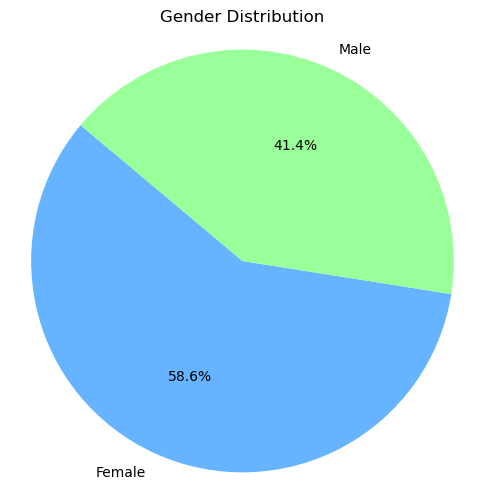

In [79]:

# Data preprocessing
df['gender'] = df['gender'].replace('Other', 'Female')

# Plotting a pie chart with custom settings
gender_counts = df['gender'].value_counts()
colors = ['#66b3ff', '#99ff99']  # Custom colors for Female and Male
labels = ['Female', 'Male']      # Custom labels

plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


* There are more females as compared to males 

## Target feature - Stroke

* Stroke analysis

In [80]:
# Value count in the stroke attribute
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

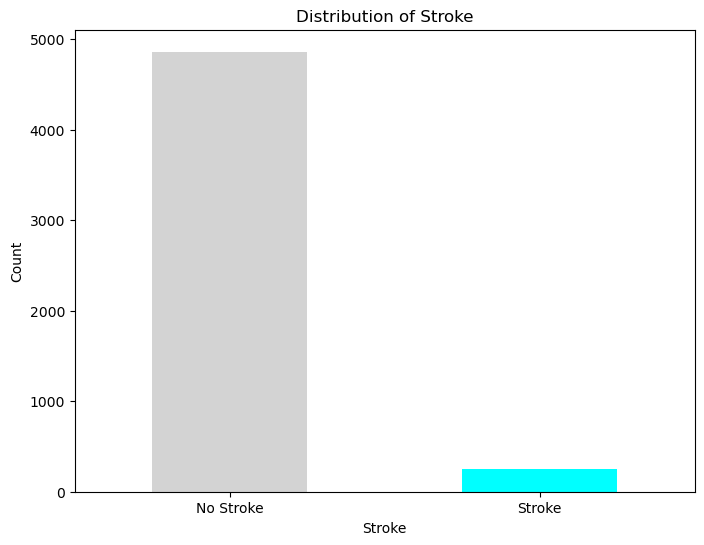

In [81]:
# Plotting a bar graph with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
colors = ['lightgray', 'cyan']  # Custom colors for 0 (No stroke) and 1 (Stroke)
labels = ['No Stroke', 'Stroke']  # Custom labels

df['stroke'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks(range(2), labels, rotation=0)

plt.show()




In [82]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


* Our dataset is highly skewed since only around 5% of the instances got stroke 
* We will be needing to perform necessary transformations to improve samples of minority class 

### Hyper-tension Analysis

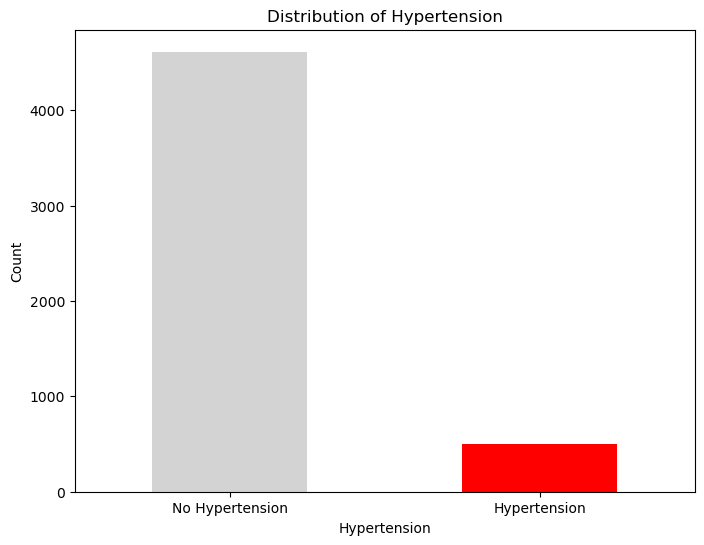

In [83]:
# Plotting a bar graph with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
colors = ['lightgray', 'red']  # Custom colors for 0 (No hypertension) and 1 (Hypertension)
labels = ['No Hypertension', 'Hypertension']  # Custom labels

df['hypertension'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(range(2), labels, rotation=0)

plt.show()


### Work type Analysis

In [84]:
# Value of count of work-type attribute
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

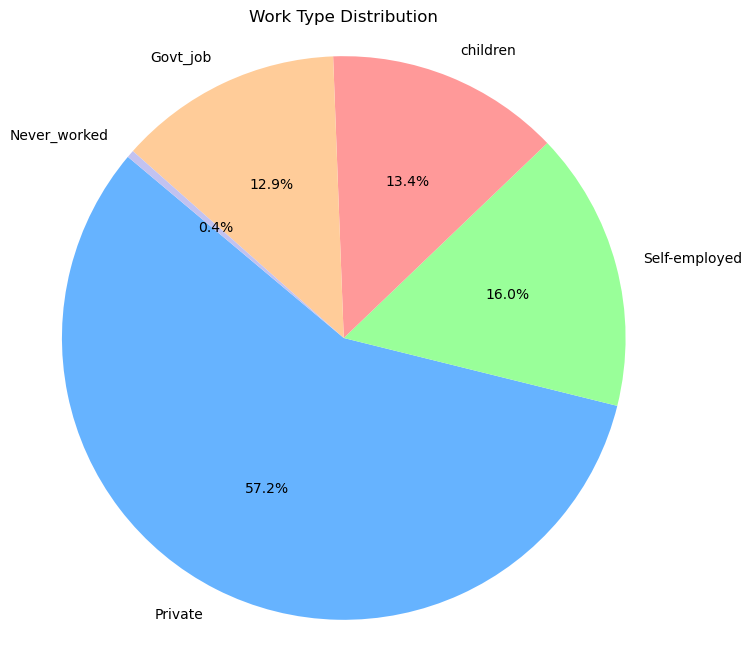

In [85]:
# Graphical representation of the value counts of the work-type attribute
# Plotting a pie chart with custom settings
plt.figure(figsize=(8, 8))  # Set the figure size
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#c2c2f0']  # Custom colors
labels = df['work_type'].value_counts().index  # Custom labels

plt.pie(df['work_type'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Work Type Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Smoking status Analysis

In [86]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

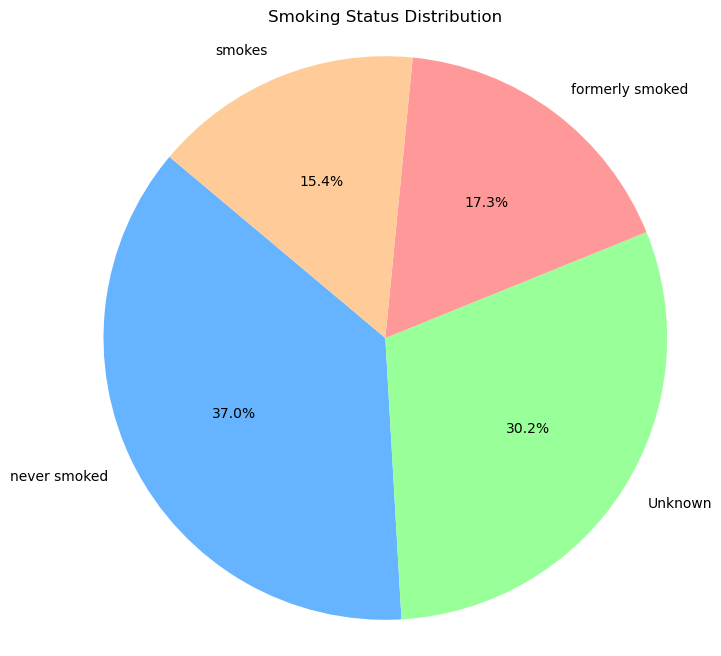

In [87]:
# Graphical representation of the value counts of the smoking staus attribute
# Plotting a pie chart with custom settings
plt.figure(figsize=(8, 8))  # Set the figure size
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99']  # Custom colors
labels = df['smoking_status'].value_counts().index  # Custom labels

plt.pie(df['smoking_status'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Smoking Status Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Residence type Analysis

In [88]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

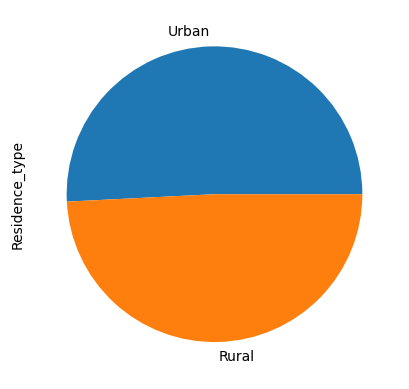

In [89]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

* We have an equal percentage of population who are from Urban and rural areas

### BMI analysis

In [90]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

201

* We only have N/A values in bmi column - 201 Null values

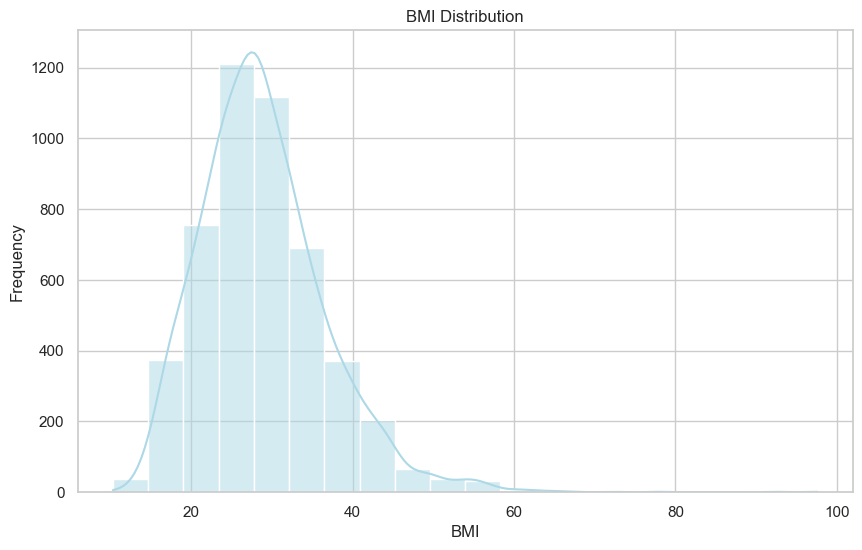

In [91]:
# Graphical representation of bmi attribute
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the histogram plot with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df['bmi'], bins=20, kde=True, color='lightblue')  # Using bins and adding a KDE curve

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

* Bmi is rightly skewed

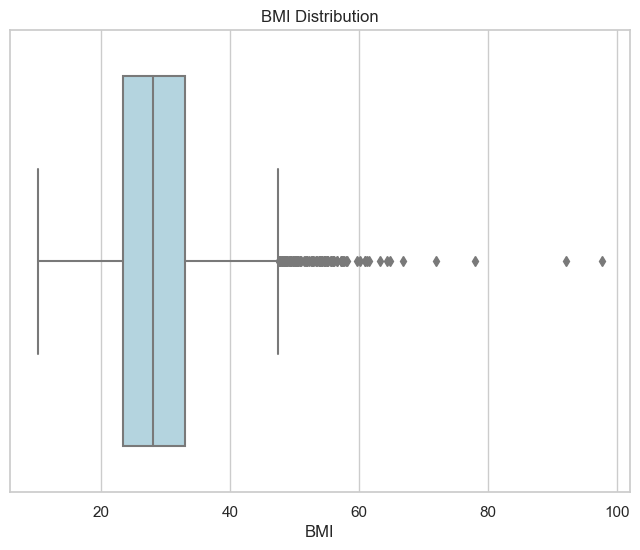

In [92]:
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the box plot with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['bmi'], color='lightblue')

plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.show()

* Based on the histogram and boxplot we see that there are many outliers in bmi 

In [93]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    5000
True      110
Name: bmi, dtype: int64

* Total outliers in bmi:110
* Total non-outliers in bmi:5000

In [94]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

* NULL values hold 3.93 % of the instances in the dataframe

In [95]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [96]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

* Our main target function is stroke And the instances who got a stroke is in the minority - 249  Which is only 4.9 % of the instances

In [97]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


* Among the 201 bmi NULL values 40 values in them got stroke 
* Thus we cant drop NULL values 

* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values


In [98]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


### AGE analysis

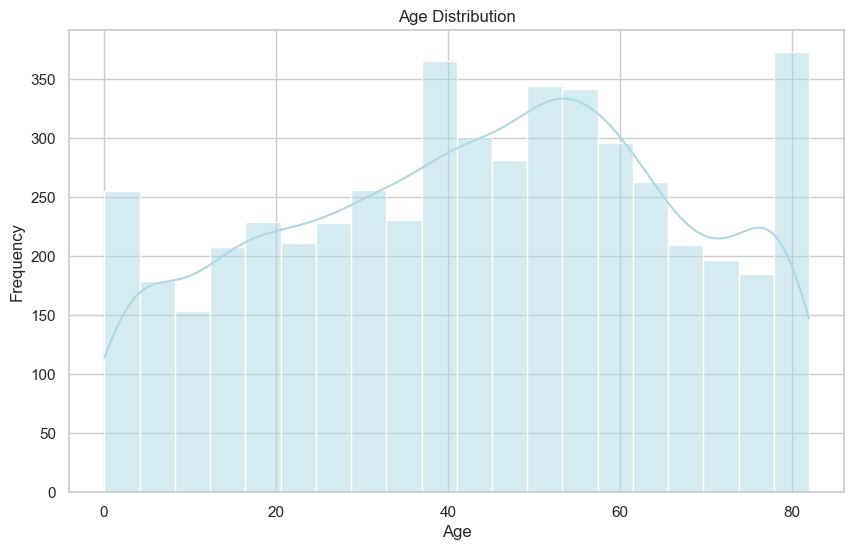

In [99]:
# Graphical representation fo the data in age column
# histogram
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the histogram plot with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df['age'], bins=20, kde=True, color='lightblue')  # Using bins and adding a KDE curve

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

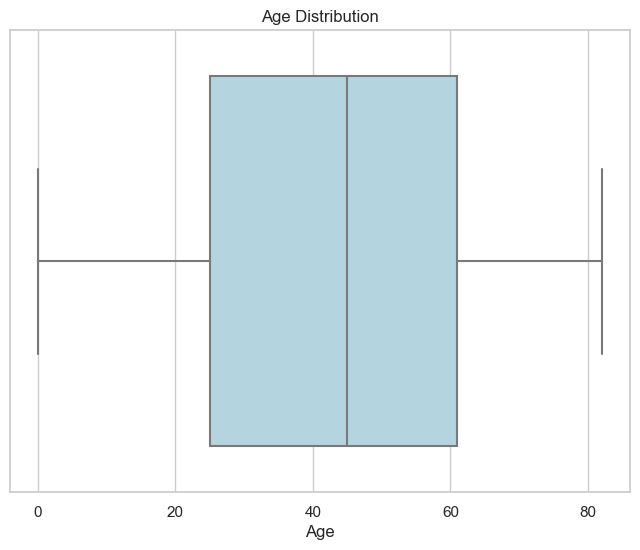

In [100]:
# boxplot
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the box plot with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['age'], color='lightblue')

plt.title('Age Distribution')
plt.xlabel('Age')

plt.show()

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL ANALYSIS

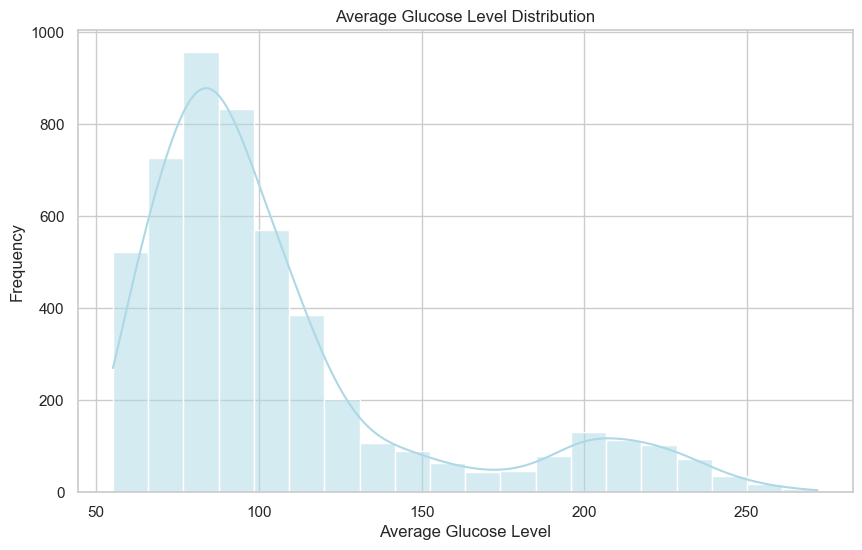

In [101]:
# Graphical representation fo the data in glucose level column
# histogram
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the histogram plot with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df['avg_glucose_level'], bins=20, kde=True, color='lightblue')  # Using bins and adding a KDE curve

plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')

plt.show()

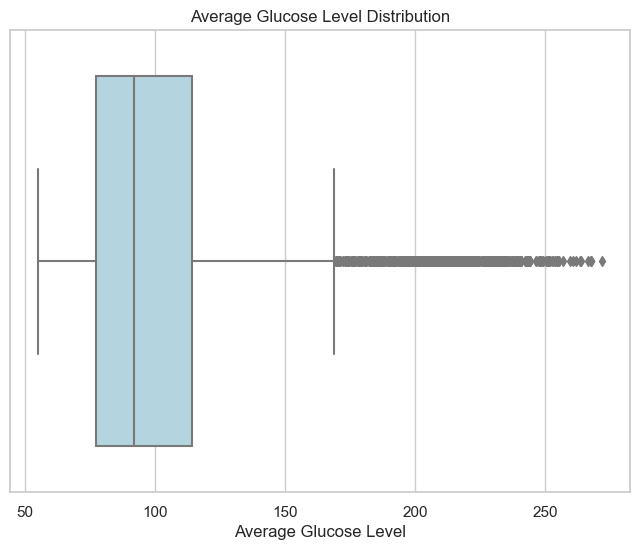

In [102]:
# Boxplot
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the box plot with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['avg_glucose_level'], color='lightblue')

plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')

plt.show()

* There are many outliers present based on the boxplot and histogram 
* The data is positively skewed 

In [103]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483

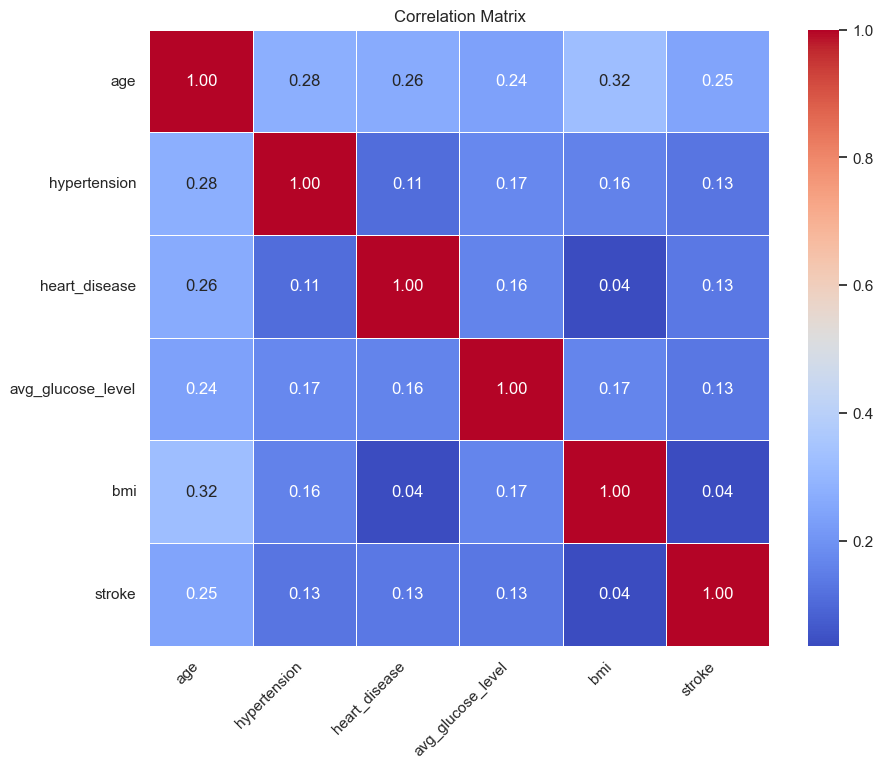

In [104]:
# Calculate the correlation matrix
corrmat = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with custom settings
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')

plt.show()

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32
* We could not drw any statistical insight from heatmap

### Heart_disease analysis 

In [105]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

* This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

<Axes: ylabel='heart_disease'>

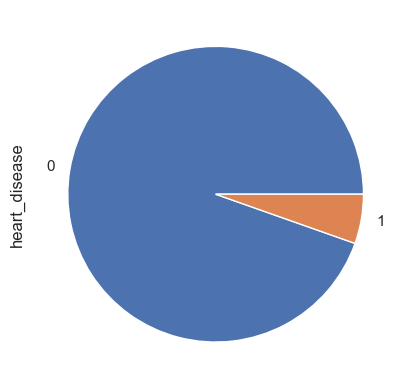

In [106]:
df['heart_disease'].value_counts().plot(kind="pie")

### Ever_married analysis with Values

In [107]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

* This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

<Axes: ylabel='ever_married'>

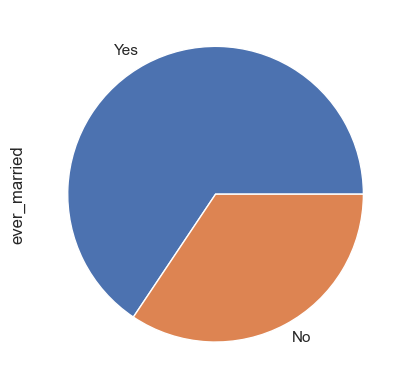

In [108]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

## Cross analysis - all the attribute compared with target attibute

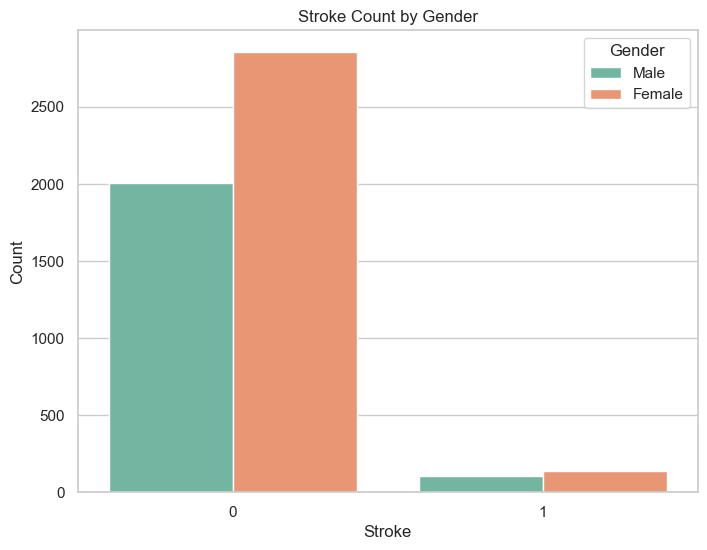

In [109]:
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the count plot with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='stroke', hue='gender', data=df, palette='Set2')

plt.title('Stroke Count by Gender')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

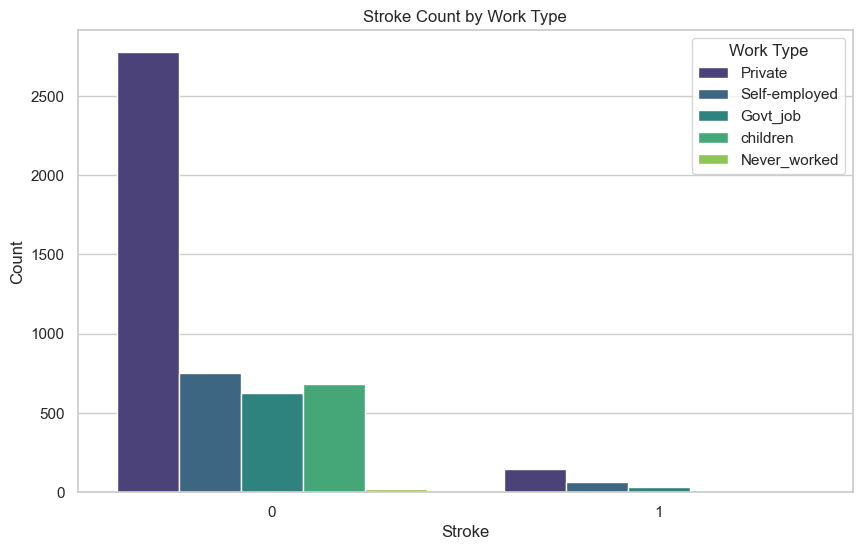

In [111]:
# Comparing stroke with work-type
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the count plot with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='work_type', data=df, palette='viridis')

plt.title('Stroke Count by Work Type')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Work Type')

plt.show()

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

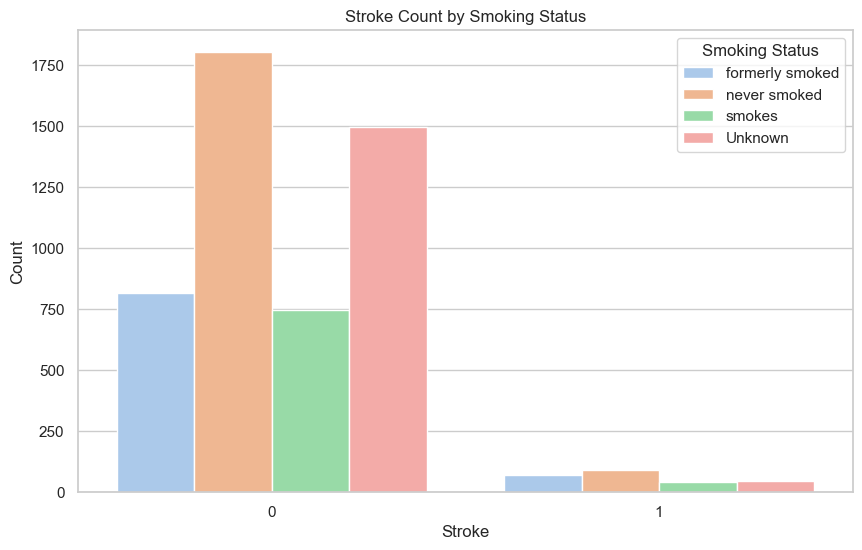

In [112]:
# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the count plot with custom settings
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='smoking_status', data=df, palette='pastel')

plt.title('Stroke Count by Smoking Status')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

plt.show()

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

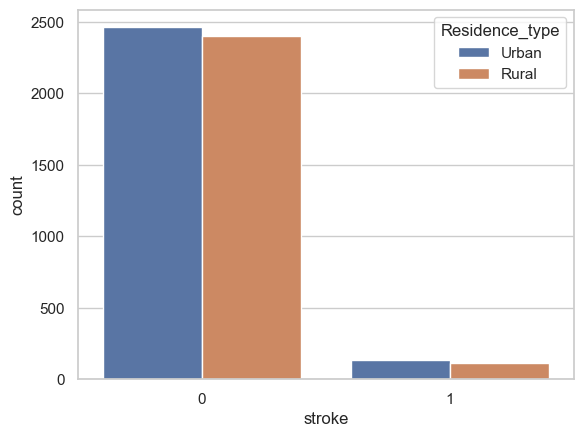

In [113]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

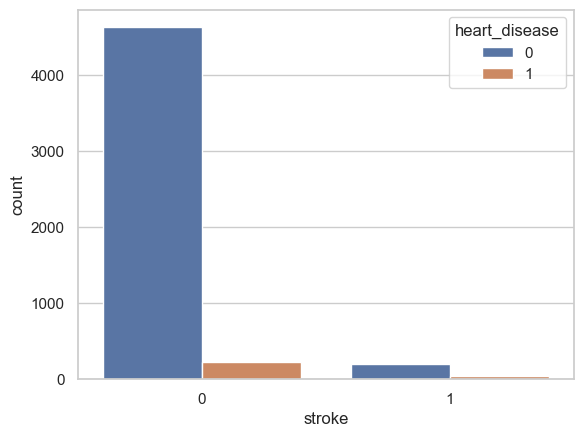

In [114]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

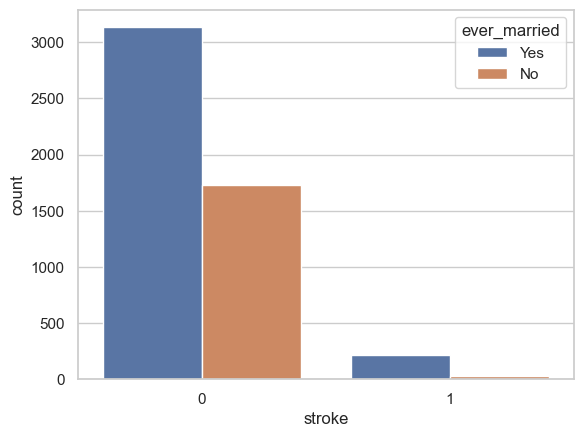

In [115]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating dummy variables for numeric-binary attributes

In [116]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)


In [117]:
# The data frame after performing dummy attributes
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [118]:
pip install --upgrade scikit-learn==1.2.2 


Note: you may need to restart the kernel to use updated packages.


In [119]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [120]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

* Scaling the numeric values for bringing them all to the same scale

### Creating test-train split (80-20 split)

In [121]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [122]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


## Training Model

### Decision Tree

In [123]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.974293059125964


### KNN

In [124]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9722365038560411
ROC AUC Score: 0.9723076923076923


### XGBoost

Accuracy: 0.9814910025706941
ROC AUC Score: 0.9987523129791172


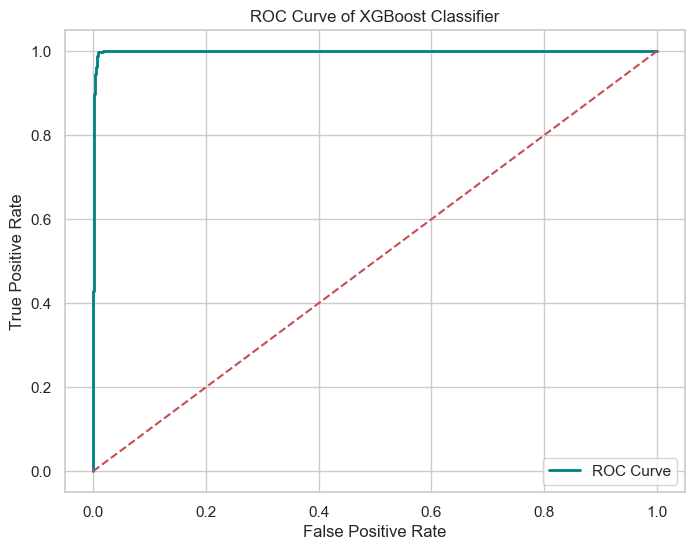

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

# Create a more visually appealing ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, color='teal', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()


In [126]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9814910025706941
Precision_score: 0.9642147117296223
Recall_score: 1.0
f1_score: 0.9817813765182186
ROC AUC Score: 0.9987523129791172


### Random Forest

In [127]:

# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.9938303341902314


In [128]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  99.39315199296948
[0.99589322 0.98973306 0.99382716 0.99588477 0.98971193 0.99794239
 0.99176955 0.98765432 1.         0.99588477 0.98971193 0.99382716
 0.99382716 1.         0.99588477 0.99588477 0.99794239 0.99382716
 0.98765432 0.99176955]


### Logistic regression

In [129]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7593830334190231


/Users/prashantjadon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1	
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)


1


Support Vector Machine:
Accuracy: 0.7491002570694087
ROC AUC Score: 0.8282178165477134


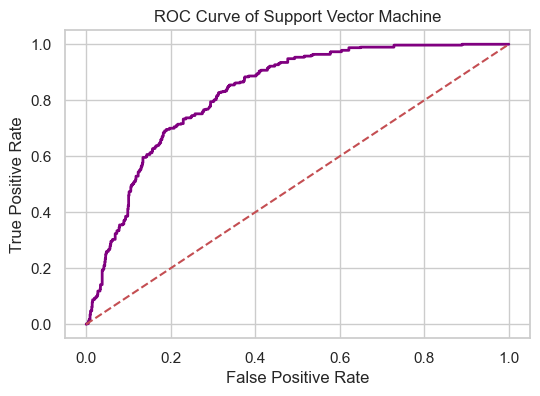

In [131]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
svm = SVC(probability=True)  # Setting probability=True for ROC curve
# Training the classifier
svm.fit(X_train, y_train)
# Predicting results using the test dataset
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Support Vector Machine:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))

# ROC curve plot
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, linewidth=2, color='purple')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


Naive Bayes:
Accuracy: 0.6745501285347044
ROC AUC Score: 0.8082727993655828


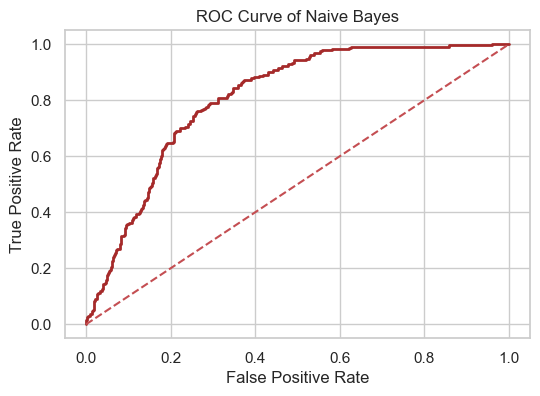

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
nb = GaussianNB()
# Training the classifier
nb.fit(X_train, y_train)
# Predicting results using the test dataset
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Naive Bayes:')
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_nb))

# ROC curve plot
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, linewidth=2, color='brown')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


Learning rate set to 0.024735
0:	learn: 0.6776724	total: 6.08ms	remaining: 6.08s
1:	learn: 0.6614949	total: 10.1ms	remaining: 5.06s
2:	learn: 0.6485114	total: 13.9ms	remaining: 4.61s
3:	learn: 0.6344958	total: 17.4ms	remaining: 4.33s
4:	learn: 0.6230877	total: 20.6ms	remaining: 4.09s
5:	learn: 0.6141877	total: 23.9ms	remaining: 3.96s
6:	learn: 0.6009367	total: 27.2ms	remaining: 3.86s
7:	learn: 0.5929665	total: 30.4ms	remaining: 3.77s
8:	learn: 0.5843352	total: 33.8ms	remaining: 3.73s
9:	learn: 0.5761170	total: 37.3ms	remaining: 3.69s
10:	learn: 0.5698760	total: 40.7ms	remaining: 3.65s
11:	learn: 0.5619901	total: 43.8ms	remaining: 3.61s
12:	learn: 0.5530022	total: 46.9ms	remaining: 3.56s
13:	learn: 0.5469278	total: 50ms	remaining: 3.52s
14:	learn: 0.5397234	total: 52.9ms	remaining: 3.47s
15:	learn: 0.5323229	total: 55.6ms	remaining: 3.42s
16:	learn: 0.5268492	total: 58.2ms	remaining: 3.37s
17:	learn: 0.5217610	total: 60.7ms	remaining: 3.31s
18:	learn: 0.5177541	total: 63ms	remaining: 3.

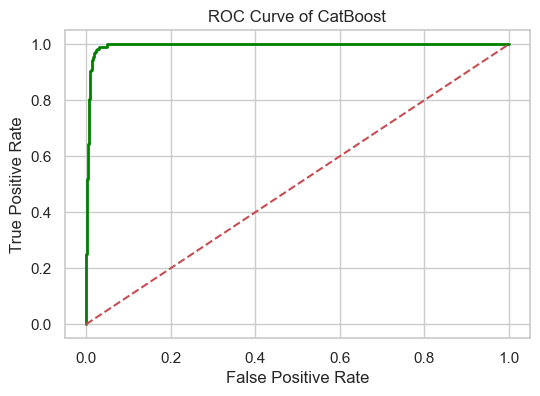

In [133]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
catboost = CatBoostClassifier()
# Training the classifier
catboost.fit(X_train, y_train)
# Predicting results using the test dataset
y_pred_catboost = catboost.predict(X_test)
y_pred_prob_catboost = catboost.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('CatBoost:')
print('Accuracy:', accuracy_score(y_test, y_pred_catboost))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_catboost))

# ROC curve plot
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_pred_prob_catboost)

plt.figure(figsize=(6, 4))
plt.plot(fpr_catboost, tpr_catboost, linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of CatBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


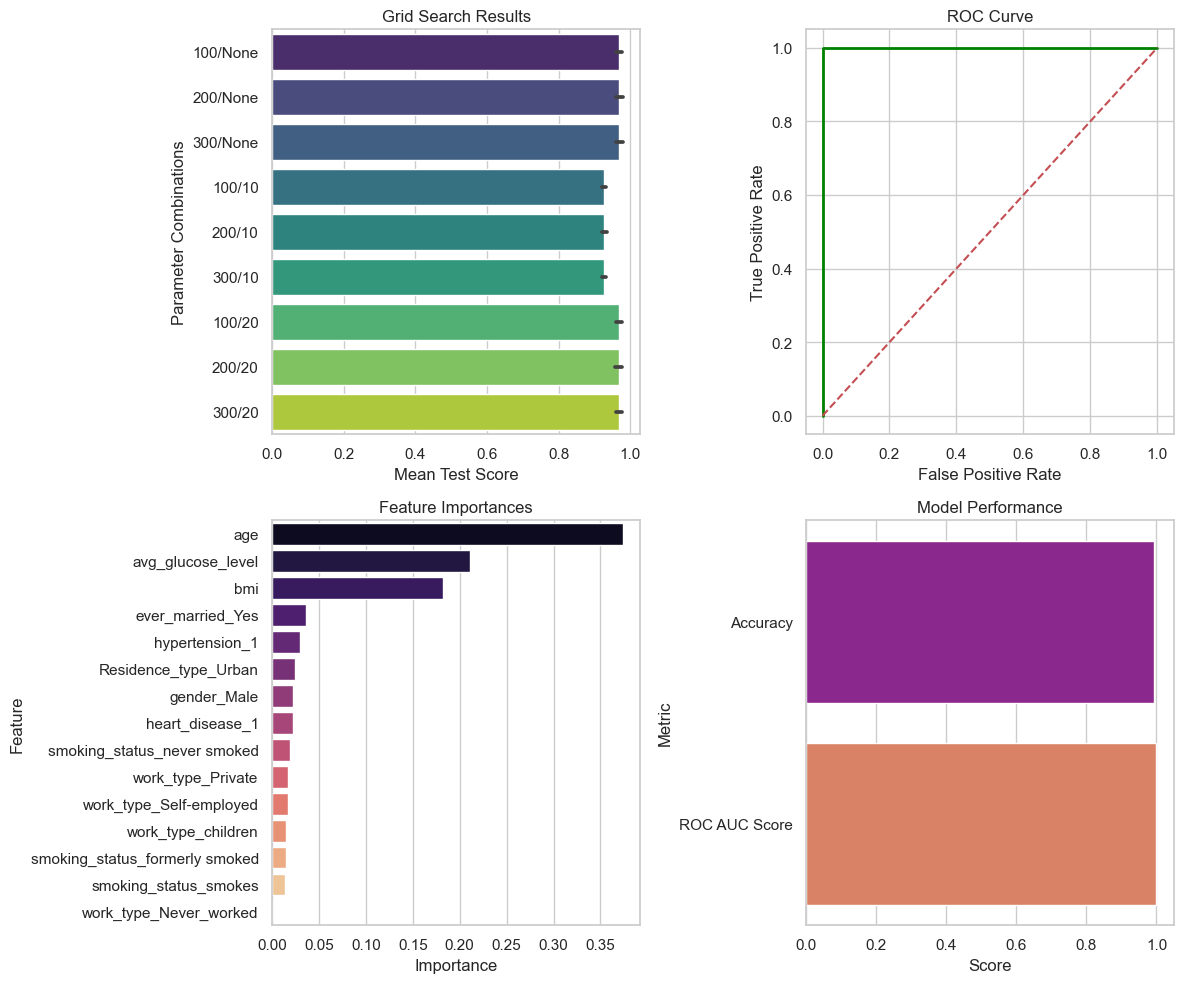

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for Seaborn plot
sns.set(style='whitegrid')

# Create the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the classifier object
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Predicting results using the test dataset
y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

# ROC curve plot
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Grid Search Results
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

param_combinations = [f"{param['n_estimators']}/{param['max_depth']}" for param in params]

sns.barplot(x=mean_test_score, y=param_combinations, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Grid Search Results')
axes[0, 0].set_xlabel('Mean Test Score')
axes[0, 0].set_ylabel('Parameter Combinations')

# Plot 2: ROC Curve
axes[0, 1].plot(fpr_rf, tpr_rf, linewidth=2, color='green')
axes[0, 1].plot([0, 1], [0, 1], 'r--')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')

# Plot 3: Feature Importances
feature_importances = best_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]  # Replace with your actual feature names
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Feature Importances')
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_ylabel('Feature')

# Plot 4: Accuracy and ROC AUC Score
sns.barplot(x=[accuracy, roc_auc], y=['Accuracy', 'ROC AUC Score'], ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('Model Performance')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Metric')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Refrences:

[1] S. Gupta and S. Raheja, ”Stroke Prediction using Machine Learning
Methods,” 2022 12th International Conference on Cloud Computing,
Data Science Engineering (Confluence), 2022, pp. 553-558, doi:
10.1109/Confluence52989.2022.9734197.

[2] N. S. Adi, R. Farhany, R. Ghina and H. Napitupulu, ”Stroke Risk Prediction Model Using Machine Learning,” 2021 International Conference
on Artificial Intelligence and Big Data Analytics, 2021, pp. 56-60, doi:
10.1109/ICAIBDA53487.2021.9689740.

[3] M. U. Emon, M. S. Keya, T. I. Meghla, M. M. Rahman, M. S. A.
Mamun and M. S. Kaiser, ”Performance Analysis of Machine Learning
Approaches in Stroke Prediction,” 2020 4th International Conference on
Electronics, Communication and Aerospace Technology (ICECA), 2020,
pp. 1464-1469, doi: 10.1109/ICECA49313.2020.9297525.

[4] R. Islam, S. Debnath and T. I. Palash, ”Predictive Analysis for
Risk of Stroke Using Machine Learning Techniques,” 2021 International Conference on Computer, Communication, Chemical, Materials and Electronic Engineering (IC4ME2), 2021, pp. 1-4, doi:
10.1109/IC4ME253898.2021.9768524.

[5] A. Devaki and C. V. G. Rao, ”An Ensemble Framework for Improving Brain Stroke Prediction Performance,” 2022 First International Conference on Electrical, Electronics, Information and Communication Technologies (ICEEICT), 2022, pp. 1-7, doi: 10.1109/ICEEICT53079.2022.9768579.